In [97]:
%config IPCompleter.greedy=True
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib as mp
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# Get IBM Qiskit Info
IBMQ.save_account('f51031e3475685cefc7d9da64af35e4117bd23f9dd31ecba6055743c28d348ae720c53e2e070ac3286122963da95baff36604f16b7a4f68603572b4323e8a17a', overwrite=True)



In [98]:
# Loading your IBM Q account(s)
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [99]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [100]:
provider = IBMQ.get_provider(group=open)

IBMQProviderError: 'No provider matching the criteria'

In [101]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [102]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q, c)

In [103]:
pi = 3.14159265359



circ.rx(pi/2, q[0])

circ.cx(q[0],q[1])

circ.measure(q,c)

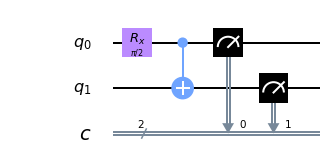

In [104]:
circ.draw()

In [123]:
shots = [1,10,100,1000,1024,2048,4096,8192]
backend = provider.get_backend('ibmqx2')

# results = []
# res = []
i = len(shots)
simLeg = []
leg = []

simJobs = []
simR = []
simCount = []

jobs = []
r = []
count = []

for x in range(0, i):    
    #Simulation Run
    simJobs.append(execute(circ, backend=Aer.get_backend('qasm_simulator'), shots=shots[x]))
    simR.append(simJobs[x].result())
    simCount.append(simR[x].get_counts(circ))
    print(simCount[x])
    simLeg.append(str(shots[x])+" Simulator shots")
    
    #Real Run
    jobs.append(execute(circ, backend=backend, shots=shots[x]))
    job_monitor(jobs[x])
    r.append(jobs[x].result())
    count.append(r[x].get_counts(circ))
    print(count[x])
    leg.append(str(shots[x])+" shots")
    
    

{'00': 1}
Job Status: job has successfully run
{'00': 1}
{'11': 7, '00': 3}
Job Status: job has successfully run
{'11': 7, '00': 3}
{'11': 44, '00': 56}
Job Status: job has successfully run
{'00': 45, '11': 51, '01': 2, '10': 2}
{'11': 504, '00': 496}
Job Status: job has successfully run
{'00': 517, '11': 453, '01': 17, '10': 13}
{'11': 505, '00': 519}
Job Status: job has successfully run
{'00': 539, '11': 460, '01': 12, '10': 13}
{'11': 1058, '00': 990}
Job Status: job has successfully run
{'00': 1068, '11': 935, '01': 30, '10': 15}
{'11': 2048, '00': 2048}
Job Status: job has successfully run
{'00': 2110, '11': 1877, '01': 67, '10': 42}
{'11': 4079, '00': 4113}
Job Status: job has successfully run
{'00': 4150, '11': 3826, '01': 139, '10': 77}


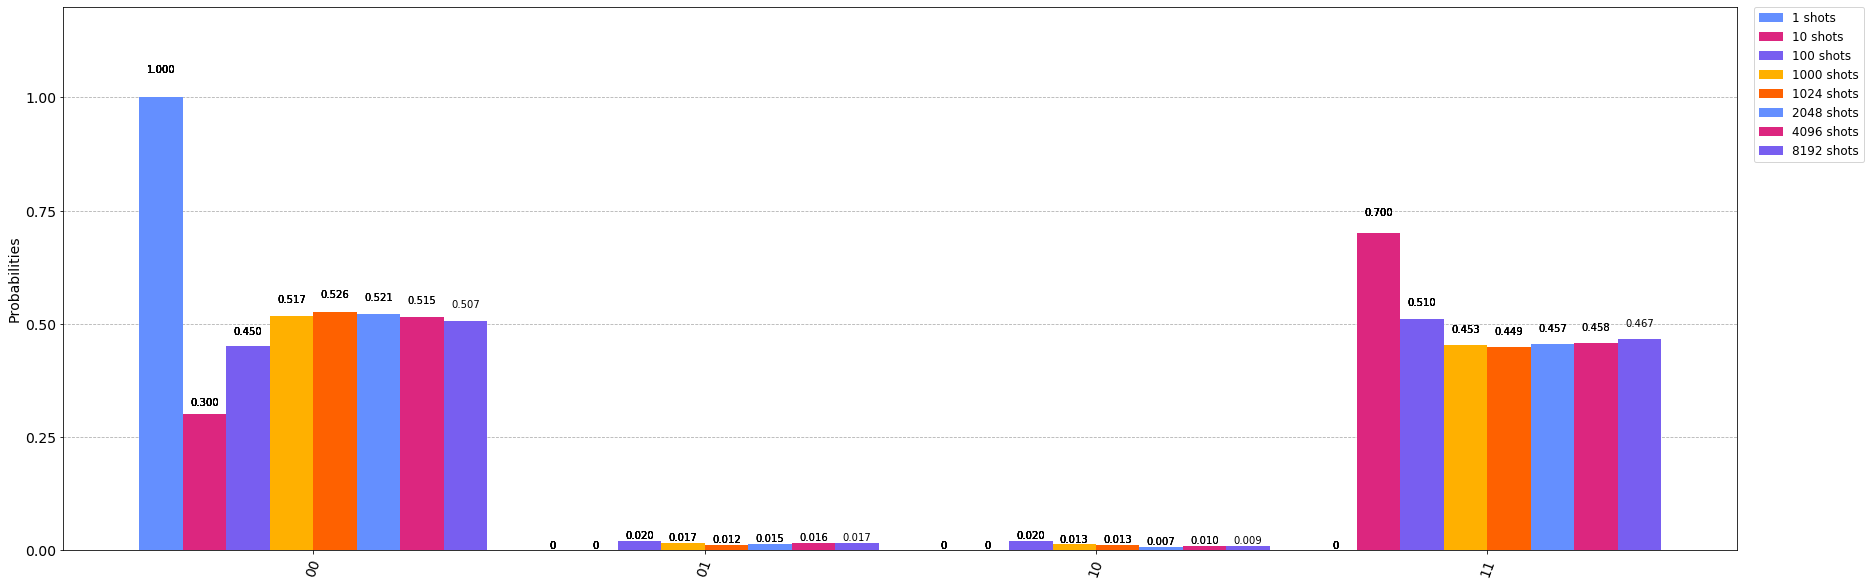

In [134]:




from qiskit.visualization import plot_histogram
# plot_histogram([res[0], res[1],res[2],res[3]], legend=leg)



plot_histogram(count, figsize=(30,10),legend = leg)

# for show in shots:
    # plot_histogram(res[i])
    
    # i = i + 1

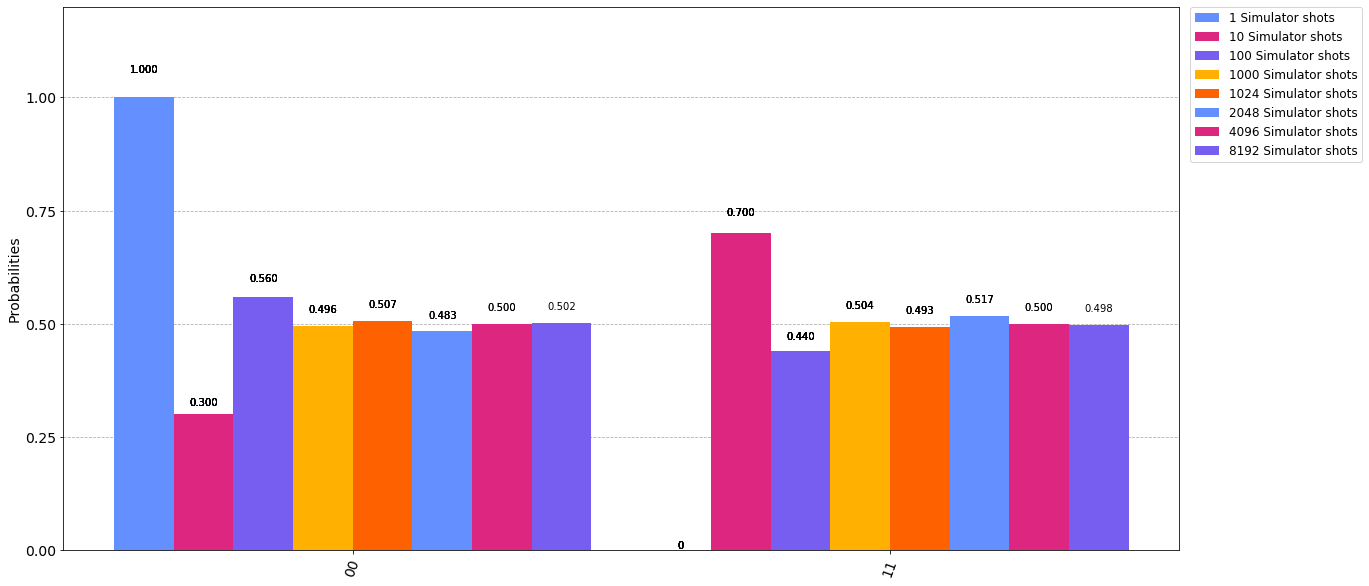

In [130]:
plot_histogram(simCount, figsize=(20,10), legend = simLeg)